In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
dataPath = '/home/mario/Graduation Project/Customize TSC/01-DataSet/images'

In [3]:
"""
This function take the dictory-Path of images and:-
1-Read image from each category file.
2-resize images to 32x32x3.
3-labeling image:-
    0-->Stop
    1-->Do not Enter
    2-->Traffic jam is close
    3-->Yeild
4-Shuffle the array to randomized it.
5-Divide into X,Y
return X,Y
"""
def loadDataSet(dataPath):
    data = []
    imageSize = 28
    for cat in os.listdir(dataPath):
        label = int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    return X,Y

In [4]:
#Load Data Set 
images,labels=loadDataSet(dataPath)

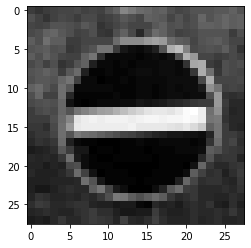

[1]


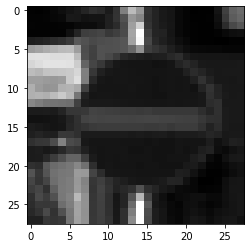

[1]


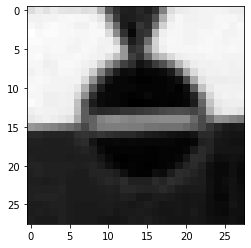

[1]


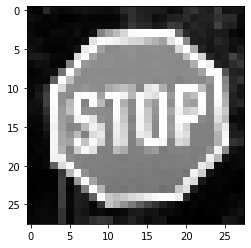

[0]


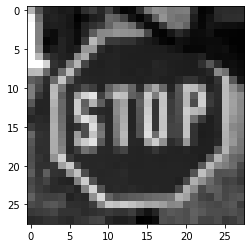

[0]


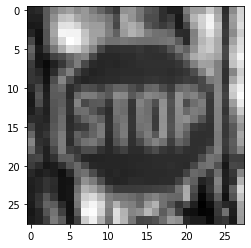

[0]


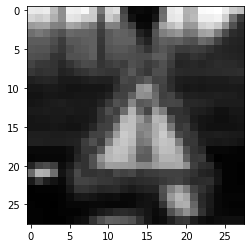

[2]


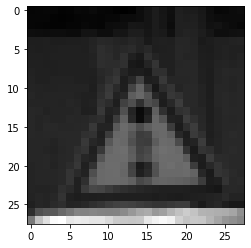

[2]


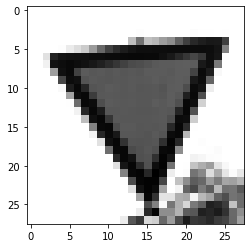

[3]


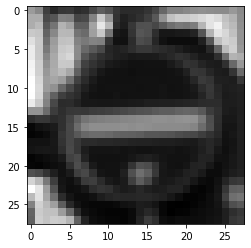

[1]


In [5]:
#plot some examples from our images
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()
    print(labels[i])

In [6]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 92.39488493223836
The Standard Deviation= 70.77168647587722


In [7]:
images.shape

(4739, 28, 28)

In [8]:
m=images.shape[0] # 3D Array (number of training images,)
imageShape=images.shape[1:]

In [9]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 3791
the Number of Testing Example= 948


In [10]:
x_trainNorm = (x_train - mu)/std
x_testNorm  = (x_test - mu)/std
x_trainNorm = x_trainNorm.reshape(3791, 28, 28,1)
x_testNorm = x_testNorm.reshape(948, 28, 28,1)

In [11]:
def preprocessingImage(image=None,imageSize=28,mu=89.77428691773054,std=70.85156431910688):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [12]:
import tensorflow as tf
from tensorflow import keras

/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

In [13]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.997):
            self.model.stop_training=True
            
model = keras.Sequential([
    keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(4,4)),
    keras.layers.Flatten(),
    keras.layers.Dense(4,tf.nn.softmax)
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1156      
Total params: 1,236
Trainable params: 1,236
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Fitting 
model.fit(x_trainNorm,
          y_train,
          epochs = 15,
          callbacks = [myCallBack()])

Epoch 1/15
3791/3791 [==============================] - 2s 464us/sample - loss: 1.0292 - accuracy: 0.6128
Epoch 2/15
3791/3791 [==============================] - 1s 203us/sample - loss: 0.4731 - accuracy: 0.9159
Epoch 3/15
3791/3791 [==============================] - 1s 206us/sample - loss: 0.2530 - accuracy: 0.9591
Epoch 4/15
3791/3791 [==============================] - 1s 200us/sample - loss: 0.1706 - accuracy: 0.9707
Epoch 5/15
3791/3791 [==============================] - 1s 189us/sample - loss: 0.1288 - accuracy: 0.9792
Epoch 6/15
3791/3791 [==============================] - 1s 195us/sample - loss: 0.1053 - accuracy: 0.9821
Epoch 7/15
3791/3791 [==============================] - 1s 183us/sample - loss: 0.0856 - accuracy: 0.9868
Epoch 8/15
3791/3791 [==============================] - 1s 178us/sample - loss: 0.0721 - accuracy: 0.9900
Epoch 9/15
3791/3791 [==============================] - 1s 183us/sample - loss: 0.0629 - accuracy: 0.9910
Epoch 10/15
3791/3791 [=======================

In [15]:
model.evaluate(x_testNorm,
               y_test,
               verbose = 0)

[0.03850577623909536, 0.99472576]

In [16]:
model.save('Models/TSModel5')

In [17]:
model=keras.models.load_model('Models/TSModel5')

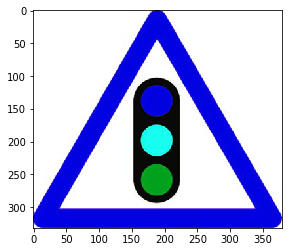

Stop = 0.0111996215%
Do not Enter = 1.0641178e-16%
Traffic Jam = 99.98879%
Yeild = 1.0522191e-14%


In [18]:
imgPath="/home/mario/Graduation Project/Customize TSC/03-Classification/UnseenImages/02/3.jpg"
image = cv2.imread(imgPath,1)
plt.imshow(image)
plt.show()
img=preprocessingImage(image)
pred=model.predict(img)*100 # 4*1

print("Stop = "+str(pred[0][0])+"%")
print("Do not Enter = " + str(pred[0][1])+"%")
print("Traffic Jam = "+str(pred[0][2])+"%")
print("Yeild = "+str(pred[0][3])+"%")

In [6]:
from tensorflow import keras

In [4]:
modelPath = '/home/mario/Graduation Project/Customize TSC/03-Classification/Models'
model = keras.models.load_model(modelPath+'/TSModel5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1156      
Total params: 1,236
Trainable params: 1,236
Non-trainable params: 0
_________________________________________________________________
